## 5. 작동하기 (2)

In [24]:
from torchvision import transforms
from materials.utils import *
from materials.SSD300 import SSD300
from materials.detection import ssd_detect
from PIL import Image, ImageDraw, ImageFont

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model checkpoint
checkpoint = './weights/weapon_weights30.pth'
model = SSD300(n_classes=2)
model.load_state_dict(torch.load(checkpoint))
model = model.to(device)
model.eval()

# Transforms
resize = transforms.Resize((300, 300))
to_tensor = transforms.ToTensor()
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])


Loaded base model.



In [25]:
import glob

train_images = list(sorted(glob.glob('./data/Weapon/TrainData/*.jpg')))
test_images = list(sorted(glob.glob('./data/Weapon/TestData/*.jpg')))

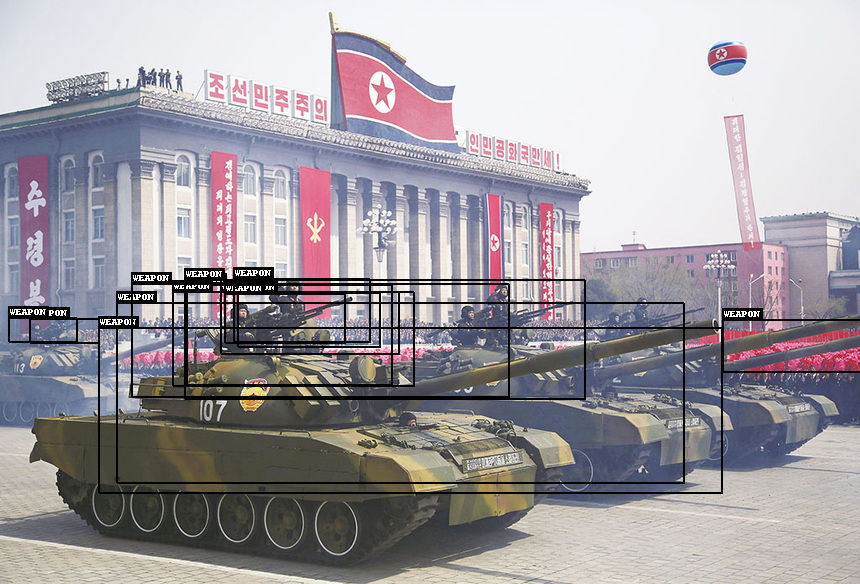

In [31]:
#img_path = train_images[222]
img_path = './img/nk.png'
original_image = Image.open(img_path, mode='r')
original_image = original_image.convert('RGB')

import warnings
warnings.filterwarnings("ignore")

annotated_image = ssd_detect(original_image, model, min_score=0.05, max_overlap=0.5, top_k=200, weapon=True)
annotated_image